<h1 id="Road Safety Data Analysis"><span style="color: #ff0000;"> Accident Data Analysis (Dept. for Transport - United Kingdom) for 2014</span></h1>

<h2 style="color: #000000;">Data Collection</h2>

The 2014 data for analysis will be used from https://data.gov.uk/dataset/road-accidents-safety-data.


<h2 style="text-align: left;">Initialize libraries, get data sets, consolidate and cleanse.</h2>

In [1]:
# Importing libraries and the data set
from pandas import Series, DataFrame
import pandas as pd
import glob
import numpy as np
import os
import matplotlib.pylab as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = 12, 4  # that's default image size for this interactive session
import scipy
from scipy import stats
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,  precision_recall_fscore_support, accuracy_score
from sklearn.preprocessing import Binarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()
from sklearn.metrics import roc_curve, auc

We will start exploring 2014 dataset.

In [2]:
RoadSafetyData = pd.read_csv("UKAccidents20141.csv")
RoadSafetyData.shape

d:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194477, 17)

### We observe about 194+ K rows and 17 variables in the dataset. 

In [3]:
RoadSafetyData.dtypes

Unnamed: 0                   int64
Accident_Index              object
Longitude                  float64
Latitude                   float64
Accident_Severity            int64
Number_of_Vehicles           int64
Number_of_Casualties         int64
Date                        object
Day_of_Week                  int64
Hour                         int64
Speed_limit                  int64
Light_Conditions             int64
Weather_Conditions           int64
Road_Surface_Conditions     object
Sex_of_Casualty            float64
Age_of_Casualty             object
Casualty_Severity            int64
dtype: object

In [4]:
RoadSafetyData.head(10)

,Unnamed: 0,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Hour,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity
0,0,201401BS70001,-0.206443,51.496345,3,2,1,9/1/2014,5,13,30,1,2,2,1.0,49,3
1,1,201401BS70002,-0.189713,51.489523,3,2,1,20/01/2014,2,14,30,7,1,1,2.0,27,3
2,2,201401BS70003,-0.173827,51.490536,3,2,1,21/01/2014,3,15,30,1,1,1,1.0,27,3
3,3,201401BS70004,-0.192311,51.496668,3,1,1,15/01/2014,4,16,30,4,1,1,2.0,31,3
4,4,201401BS70006,-0.171308,51.495892,3,2,1,9/1/2014,5,17,30,1,1,1,1.0,32,3
5,5,201401BS70008,-0.204301,51.495863,3,3,1,17/01/2014,6,18,30,1,1,1,1.0,41,3
6,6,201401BS70009,-0.201326,51.498245,3,2,1,10/1/2014,6,19,30,4,1,2,1.0,30,3
7,7,201401BS70010,-0.216389,51.518349,3,2,1,30/01/2014,5,20,30,4,2,2,1.0,71,3
8,8,201401BS70011,-0.207445,51.507511,3,2,1,10/1/2014,6,21,30,1,1,1,2.0,45,3
9,9,201401BS70013,-0.179731,51.497822,3,2,1,5/1/2014,1,22,30,4,2,2,1.0,45,3


<h2>&nbsp;</h2>
<h2>Exploratory Data Analysis</h2>
<p>In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with vizual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.</p>
<p>&nbsp;The pupose of this exercise is to visually analyze to answer the following questions:</p>
<p>1.&nbsp;Comparision of Accident Severity (Fatal, Severe or Slight Injury)<br />2. Number of accidents by&nbsp;Number_of_Vehicles<br />3. Number of accidents by&nbsp;Number_of_Casualties<br />4. Number of accidents by&nbsp;Day_of_Week<br />5. Number of accidents by&nbsp;Hour<br />6. Number of accidents based on Speed Limit<br />7. Number of accidents based on&nbsp;Light_Conditions<br />8. Number of accidents based on&nbsp;Weather_Conditions<br />9. Number of accidents by&nbsp;Road_Surface_Conditions<br />10. Number of accidents by&nbsp;Sex_of_Casualty<br />11. Number of accidents based on&nbsp;Age_of_Casualty<br />12. Plotting all accident loacation on a map using Latitude and Longitude</p>
<p>&nbsp;</p>

In [5]:
RoadSafetyData['ACC_FATAL'] = np.where(RoadSafetyData.Accident_Severity == 1, 1 , 0)
RoadSafetyData['ACC_SEVERE'] = np.where(RoadSafetyData.Accident_Severity == 2, 1 , 0)
RoadSafetyData['ACC_SLIGHT'] = np.where(RoadSafetyData.Accident_Severity == 3, 1 , 0)

In [6]:
RoadSafetyData['ACC_COUNT'] = np.where(RoadSafetyData.Accident_Severity > 0 , 1 , 0)

### Checking for blank/NULL values in the data variables. <h3 id="Road Safety Data Analysis"><span style="color: #ff0000;"> Of all the variables checked, only Age of Casualty has NULL/NAN values (3074 out of 194477).</span></h1>

In [34]:
bySeverity = RoadSafetyData.groupby('Accident_Severity')
bySeverity ['Accident_Severity'].count()

Accident_Severity
1      2898
2     29024
3    162555
Name: Accident_Severity, dtype: int64

In [40]:
bySeverity = RoadSafetyData.groupby('Number_of_Vehicles')
bySeverity ['Number_of_Vehicles'].count()

Number_of_Vehicles
1      49206
2     118424
3      19757
4       5102
5       1286
6        378
7        142
8         99
9         35
10        35
11         3
13         4
19         1
21         5
Name: Number_of_Vehicles, dtype: int64

In [41]:
byDayOfWeek = RoadSafetyData.groupby('Number_of_Casualties')
byDayOfWeek['Number_of_Casualties'].count()

Number_of_Casualties
1     114481
2      43734
3      19062
4       8980
5       4280
6       1836
7        658
8        328
9        261
10       160
11        88
12        60
13        39
14        28
15        15
16        32
17        34
18        18
19        19
20        20
21        42
27        27
41        41
54        54
87        87
93        93
Name: Number_of_Casualties, dtype: int64

In [42]:
byDayOfWeek = RoadSafetyData.groupby('Day_of_Week')
byDayOfWeek['Day_of_Week'].count()

Day_of_Week
1    22544
2    27579
3    29090
4    28687
5    28438
6    31613
7    26526
Name: Day_of_Week, dtype: int64

In [43]:
byDayOfWeek = RoadSafetyData.groupby('Hour')
byDayOfWeek['Hour'].count()

Hour
0      2909
1      2075
2      1555
3      1344
4      1169
5      1735
6      3570
7      8274
8     13676
9      9424
10     8949
11    10686
12    11918
13    11739
14    11961
15    14946
16    16001
17    17323
18    13745
19     9996
20     7245
21     5642
22     4891
23     3704
Name: Hour, dtype: int64

In [36]:
bySpeed_limit = RoadSafetyData.groupby('Speed_limit')
bySpeed_limit['Speed_limit'].count()

Speed_limit
20      4003
30    118657
40     17095
50      8808
60     30074
70     15840
Name: Speed_limit, dtype: int64

In [37]:
byLight_Conditions = RoadSafetyData.groupby('Light_Conditions')
byLight_Conditions['Light_Conditions'].count()

Light_Conditions
1    142923
4     37405
5      1206
6     10809
7      2134
Name: Light_Conditions, dtype: int64

In [38]:
byWeather_Conditions = RoadSafetyData.groupby('Weather_Conditions')
byWeather_Conditions['Weather_Conditions'].count()

Weather_Conditions
1    157748
2     23722
3       322
4      2169
5      3158
6       125
7      1096
8      3145
9      2992
Name: Weather_Conditions, dtype: int64

In [39]:
bySex_of_Casualty = RoadSafetyData.groupby('Sex_of_Casualty')
bySex_of_Casualty ['Sex_of_Casualty'].count()

Sex_of_Casualty
1.0    115061
2.0     79413
Name: Sex_of_Casualty, dtype: int64

In [44]:
bySex_of_Casualty = RoadSafetyData.groupby('Age_of_Casualty')
bySex_of_Casualty ['Age_of_Casualty'].count()

Age_of_Casualty
       3074
0       132
1       462
10     1207
100       1
101       1
102       2
11     1557
12     1599
13     1535
14     1483
15     1559
16     2519
17     4137
18     5232
19     5346
2       628
20     5255
21     5272
22     5160
23     5111
24     4830
25     4997
26     4457
27     4267
28     4200
29     3978
3       752
30     4365
31     3592
       ... 
72      757
73      712
74      721
75      745
76      701
77      671
78      639
79      626
8      1057
80      671
81      581
82      522
83      513
84      462
85      453
86      278
87      279
88      241
89      204
9      1070
90      183
91      121
92       93
93       74
94       49
95       36
96       19
97       13
98       13
99        4
Name: Age_of_Casualty, dtype: int64

<h1 id="Road Safety Data Analysis"><span style="color: #ff0000;"> Of all the variables checked, only Age of Casualty has NULL/NAN values (3074 out of 194477).</span></h1>

## Comparision of Accident Severity (Fatal, Severe or Slight Injury)

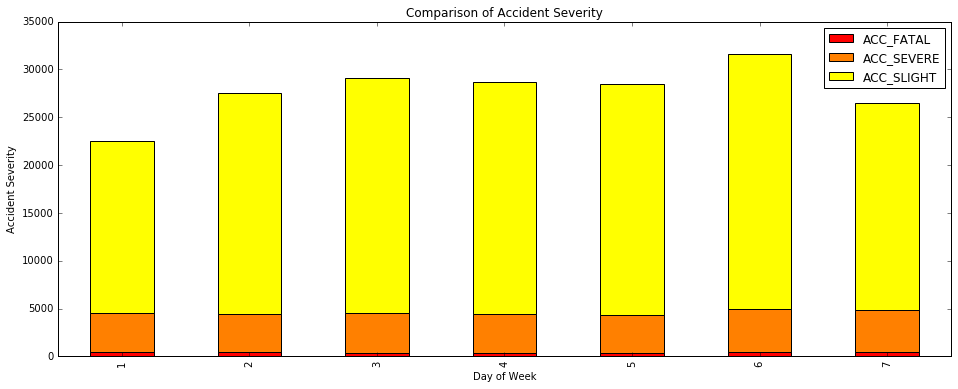

In [46]:
RoadSafetyData.pivot_table(columns='Day_of_Week')
delays_list = ['ACC_FATAL','ACC_SEVERE','ACC_SLIGHT']
RoadSafetyData_by_day = RoadSafetyData.pivot_table(index='Day_of_Week', values=delays_list, aggfunc='sum')
RoadSafetyData_by_day.plot(kind='bar', figsize=[16,6], stacked=True, colormap='autumn') # area plot
plt.xlabel('Day of Week')
plt.ylabel('Accident Severity')
plt.title('Comparison of Accident Severity')

Day of Week
1 - Sunday, 2 - Monday, 3 - Tuesday, 4 - Wednesday, 5 - Thursday, 6 - Friday, 7 - Saturday

Accident Severity
1 - Fatal, 2 - Serious, 3 - Slight

Based on the above chart, we observe that
a. Most accidents are slight injuries and fatal accidents are at the minimum.
b. Friday seems to have more accidents and accidents are progressive starting Sunday.

### Number of accidents by Number of Vehicles

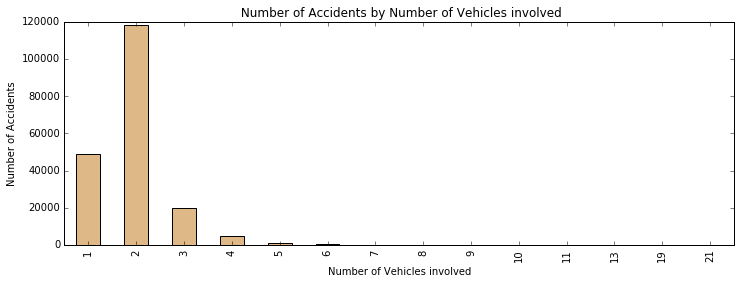

In [47]:
temp1 =  RoadSafetyData[ RoadSafetyData.ACC_COUNT > 0]
temp2 = temp1.groupby('Number_of_Vehicles').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Number of Vehicles involved')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accidents by Number of Vehicles involved')

### Number of accidents by Number of Casualties

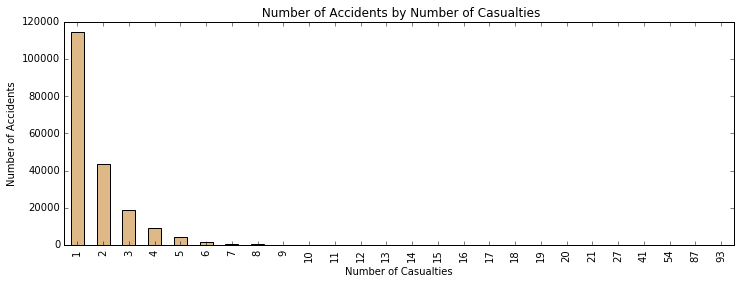

In [49]:
temp1 =  RoadSafetyData[ RoadSafetyData.ACC_COUNT > 0]
temp2 = temp1.groupby('Number_of_Casualties').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Number of Casualties')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accidents by Number of Casualties')

### Number of accidents by Day of Week

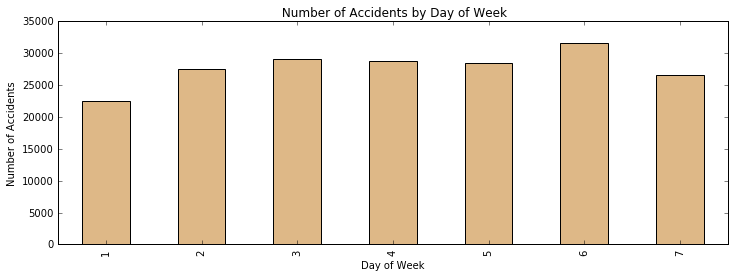

In [50]:
temp1 =  RoadSafetyData[ RoadSafetyData.ACC_COUNT > 0]
temp2 = temp1.groupby('Day_of_Week').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accidents by Day of Week')

### Number of accidents by Hour of Day

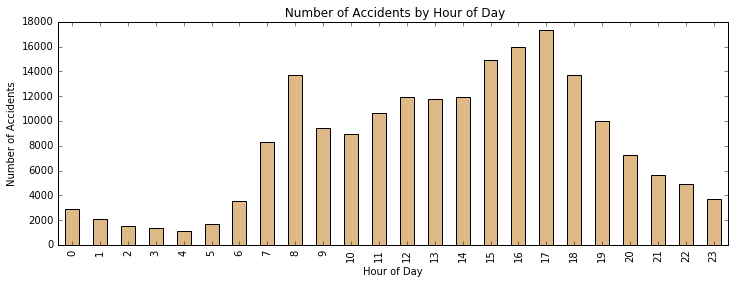

In [51]:
temp1 =  RoadSafetyData[ RoadSafetyData.ACC_COUNT > 0]
temp2 = temp1.groupby('Hour').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accidents by Hour of Day')

### Number of accidents by Speed Limit

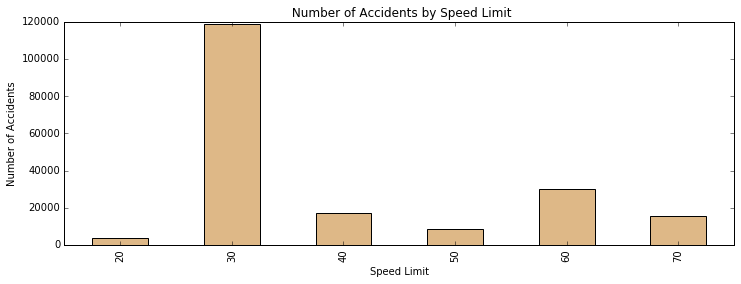

In [52]:
temp1 =  RoadSafetyData[ RoadSafetyData.ACC_COUNT > 0]
temp2 = temp1.groupby('Speed_limit').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accidents by Speed Limit')

1 - Pedal cycle, 3 - Motorcycle 125cc and under, 5 - Motorcycle over 500cc
8 - Taxi/Private hire car, 9 - Car, 19	Van / Goods 3.5 tonnes mgw or under

The highest casue of accidents are Cars and other vehicles are are at the minimum.

### Number of accidents by Light conditions

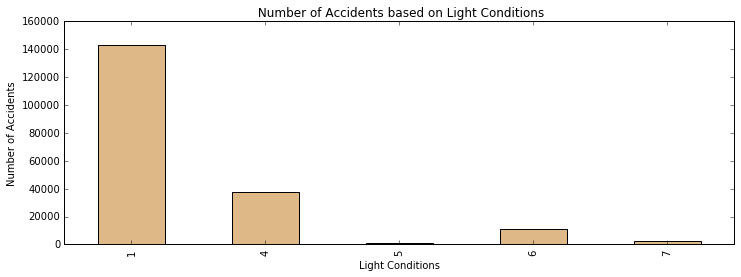

In [53]:
temp1 =  RoadSafetyData[ RoadSafetyData.ACC_COUNT > 0]
temp2 = temp1.groupby('Light_Conditions').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accidents based on Light Conditions')

1	Daylight
4	Darkness - lights lit
5	Darkness - lights unlit
6	Darkness - no lighting
7	Darkness - lighting unknown

More accidents have occurred during the day.

### Number of accidents by Weather conditions

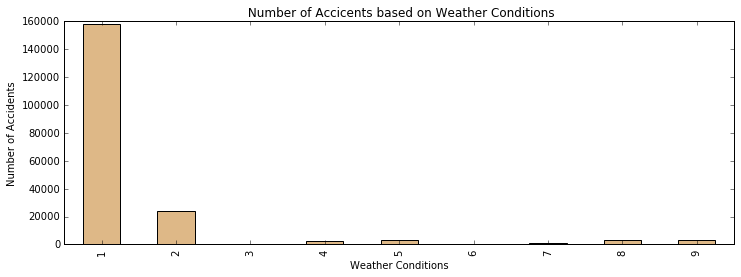

In [54]:
temp1 =  RoadSafetyData[ RoadSafetyData.ACC_COUNT > 0]
temp2 = temp1.groupby('Weather_Conditions').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accicents based on Weather Conditions')

1 - Fine no high winds, 2 - Raining no high winds, 3 - Snowing no high winds, 4 - Fine + high winds
5 - Raining + high winds, 6 - Snowing + high winds, 7 - Fog or mist, 8 - Other, 9 - Unknown

Most accidents have happened under clear weather followed by Rain.

### Number of accidents by Surface conditions

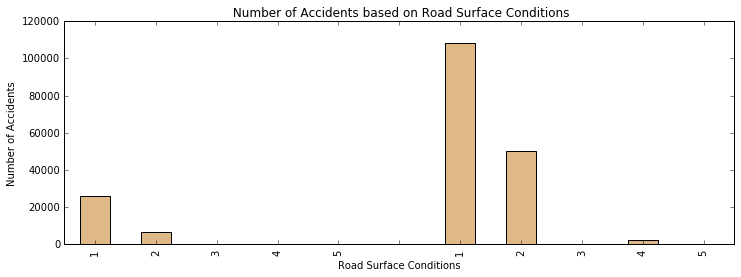

In [56]:
temp1 =  RoadSafetyData[ RoadSafetyData.ACC_COUNT > 0]
temp2 = temp1.groupby('Road_Surface_Conditions').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accidents based on Road Surface Conditions')

In [ ]:
1	Dry
2	Wet or damp
3	Snow
4	Frost or ice
5	Flood over 3cm. deep
6	Oil or diesel
7	Mud

Most accidents have occured during dry conditions.

### Number of accidents based on Sex of Casualty

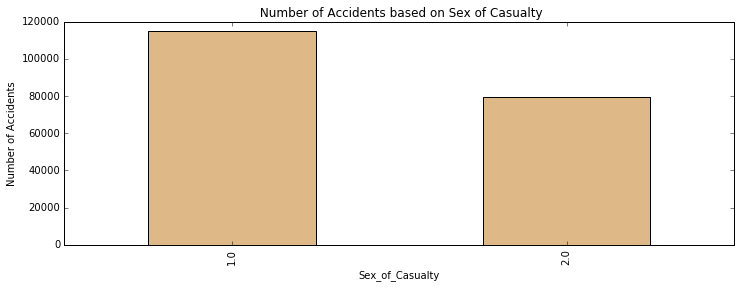

In [57]:
temp1 =  RoadSafetyData[ RoadSafetyData.ACC_COUNT > 0]
temp2 = temp1.groupby('Sex_of_Casualty').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Sex_of_Casualty')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accidents based on Sex of Casualty')

1	Male
2	Female

### Number of accidents based on Age of Casualty

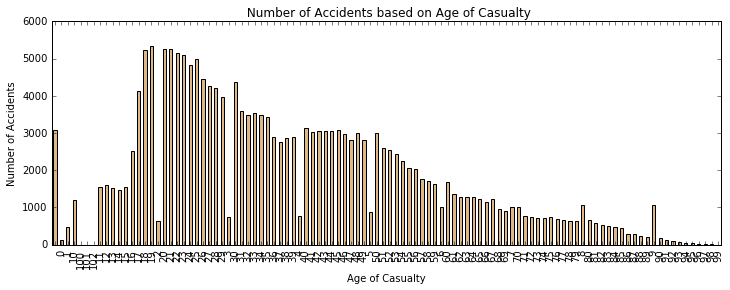

In [59]:
temp1 =  RoadSafetyData[ RoadSafetyData.ACC_COUNT > 0 ]                                                                 
temp2 = temp1.groupby('Age_of_Casualty').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Age of Casualty')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accidents based on Age of Casualty')

Casualty is seen to be affecting mostly younger people.


### Plotting all accident loacation on a map using Latitude and Longitude.

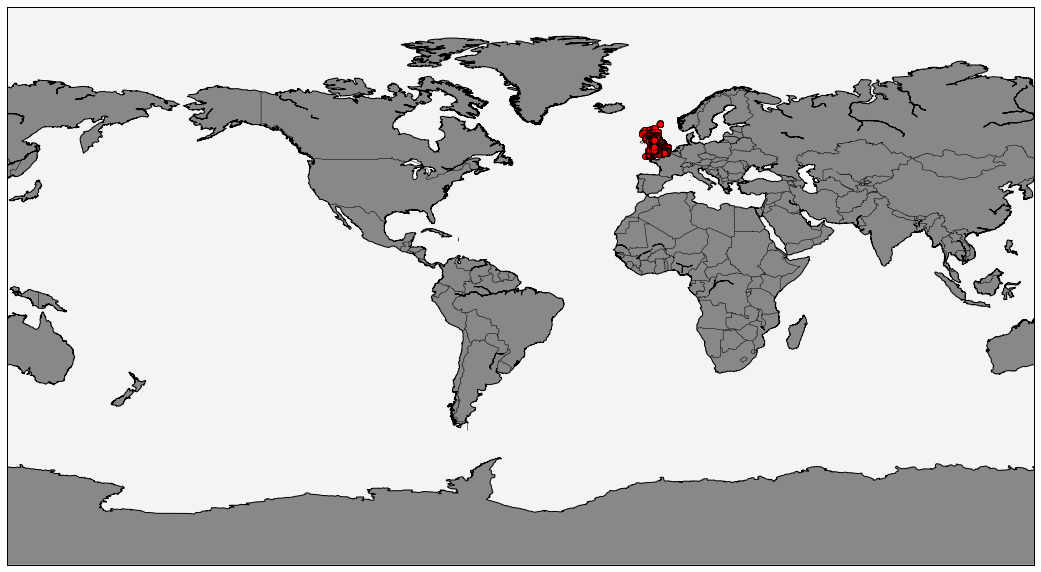

In [60]:
# Import pandas
import pandas as pd

# Import matplotlib and Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Set iPython to display visualization inline
%matplotlib inline

# Create a figure of size (i.e. pretty big)
fig = plt.figure(figsize=(20,10))

# Create a map, using the Gall–Peters projection,  gall
map = Basemap(projection='gall', 
              # with low resolution,
              resolution = 'l', 
              # And threshold 100000
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_1=51.,lat_2=51,lat_0=29,lon_0=-50.)
#              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(RoadSafetyData['Longitude'].values, RoadSafetyData['Latitude'].values)

# Plot them using round markers of size 6
map.plot(x, y, 'ro', markersize=6)

# Show the map
plt.show()

## Perform Logistic Regression using StatsModels

Optimization terminated successfully.
         Current function value: 0.072698
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              ACC_FATAL   No. Observations:               194477
Model:                          Logit   Df Residuals:                   194467
Method:                           MLE   Df Model:                            9
Date:                Mon, 28 Nov 2016   Pseudo R-squ.:                 0.06160
Time:                        10:05:23   Log-Likelihood:                -14138.
converged:                       True   LL-Null:                       -15066.
                                        LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
intercept             -3.3766        nan        nan        nan           nan       nan
Day_o

[]

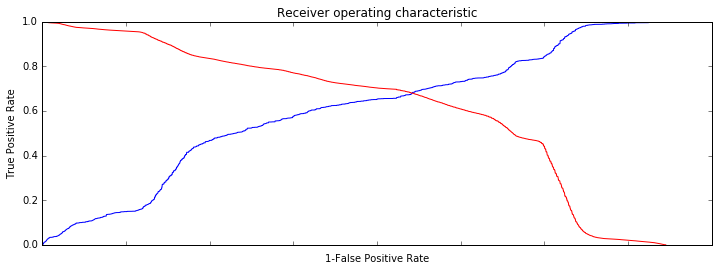

In [4]:
#Reading the data from 2014 Accident Data
df = pd.read_csv("UKAccidents20141.csv")
df['ACC_FATAL'] = np.where(df.Accident_Severity == 1, 1 , 0)

#drop unnecesary columns
df.drop(['Accident_Severity','Accident_Index', 'Longitude', 'Latitude', 'Number_of_Vehicles'], axis=1, inplace=True)
df.drop(['Number_of_Casualties', 'Date', 'Road_Surface_Conditions', 'Sex_of_Casualty'], axis=1, inplace=True)
df.drop(['Age_of_Casualty', 'Casualty_Severity'], axis=1, inplace=True)

#df.head()

df.columns = ['Unnamed','Day_of_Week', 'Hour',  'Speed_limit', 'Light_Conditions', 'Weather_Conditions','ACC_FATAL']

# making speed limit a dummy column
dummy_ranks = pd.get_dummies(df['Speed_limit'], prefix='Speed_limit')

# merging and keeping the data for regression
cols_to_keep = ['Day_of_Week', 'Hour','Light_Conditions', 'Weather_Conditions','ACC_FATAL']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'Speed_limit_2':])


# manually add the intercept to gaurantee that the residuals have a mean of zero
data['intercept'] = 1

train_cols = data[['intercept','Day_of_Week', 'Hour','Light_Conditions','Weather_Conditions',
                   'Speed_limit_20' ,'Speed_limit_30','Speed_limit_40', 'Speed_limit_50', 'Speed_limit_60', 'Speed_limit_70' ]]
#train_cols.head()

test_cols = data['ACC_FATAL']
#test_cols.head()

result = sm.Logit(test_cols, train_cols).fit()
print result.summary()

#Adding prediction to dataframe
data['pred'] = result.predict(train_cols)

fpr, tpr, thresholds =roc_curve(data['ACC_FATAL'], data['pred'])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 
                    'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])